In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats
from patsy import dmatrices
import seaborn as sns

### Statistical Analysis

In [2]:
data = pd.read_csv('twitter_data/tweets_processed.csv')
green = pd.read_csv('twitter_data/green_tweets_processed.csv')

/var/folders/pv/j2wxhdx50y5fbwqrc2yxqwf00000gn/T/ipykernel_59629/825147836.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('twitter_data/tweets_processed.csv')


drop unwanted columns

In [3]:
columns_to_drop = [
'possibly_sensitive',
 'tweets_original',
 'source',
 'Sektor',
 'lang',
 'created_at',
 'id',
 'Branche',
 'B2B',
 'quote_ids',
 'retweet_ids',
 'media_keys',
 'poll_ids',
 'urls',
 'cashtags',
 'entity_types',
 'entity_names',
 'mentioned_hashtags',
 'sourcetweet_text',
 'Tweets']
stats = data.drop(columns=columns_to_drop)
stats

,author,Branche-6,B2C,likes,retweets,replies,quotes,mentioned_usernames,year,more_information_provided,green
0,MercedesBenz,Automobil,True,829,95,7,3,[],2018,True,False
1,Porsche,Automobil,True,257,46,8,3,[],2018,True,False
2,MunichRe,Finance/Insurance,False,13,4,1,0,[],2018,True,True
3,MercedesBenz,Automobil,True,425,73,5,3,['FIAFormulaE'],2018,True,False
4,MercedesBenz,Automobil,True,0,76,0,0,['MercedesAMGF1'],2018,False,False
...,...,...,...,...,...,...,...,...,...,...,...
306126,Brenntag,Technik,False,5,1,0,0,[],2018,True,False
306127,adidas,Textil,True,0,280,0,0,['adidasrunning'],2018,False,True
306128,continentaltire,Automobil,False,8,3,0,0,[],2018,True,False
306129,covestro,Technik,False,19,4,0,2,[],2018,True,True


Transform categorical/boolean variables to numerical form for statistical analysis

In [4]:
cat_columns = stats.select_dtypes(['bool']).columns
stats[cat_columns] = stats[cat_columns].apply(lambda x: pd.factorize(x)[0])
stats

,author,Branche-6,B2C,likes,retweets,replies,quotes,mentioned_usernames,year,more_information_provided,green
0,MercedesBenz,Automobil,0,829,95,7,3,[],2018,0,0
1,Porsche,Automobil,0,257,46,8,3,[],2018,0,0
2,MunichRe,Finance/Insurance,1,13,4,1,0,[],2018,0,1
3,MercedesBenz,Automobil,0,425,73,5,3,['FIAFormulaE'],2018,0,0
4,MercedesBenz,Automobil,0,0,76,0,0,['MercedesAMGF1'],2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...
306126,Brenntag,Technik,1,5,1,0,0,[],2018,0,0
306127,adidas,Textil,0,0,280,0,0,['adidasrunning'],2018,1,1
306128,continentaltire,Automobil,1,8,3,0,0,[],2018,0,0
306129,covestro,Technik,1,19,4,0,2,[],2018,0,1


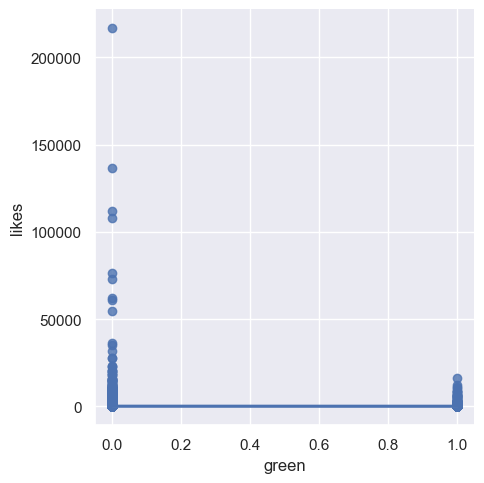

In [ ]:
x_var = 'green'
y_var = 'likes'
sns.set(rc={'figure.figsize':(16,8)})
sns.lmplot(x=x_var, y=y_var, data=stats)

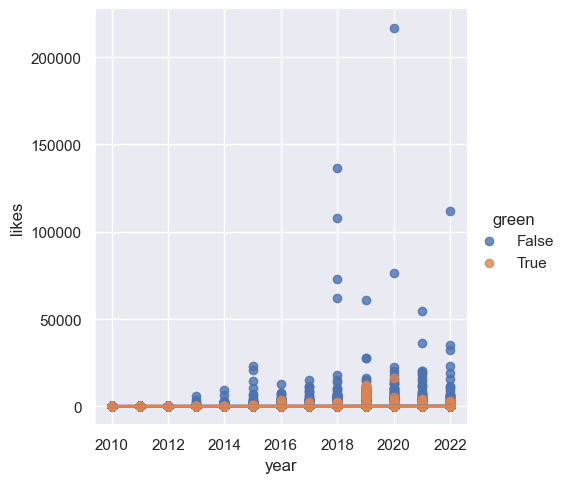

In [ ]:
hue = 'green'
sns.set(rc={'figure.figsize':(16,8)})
sns.lmplot(x = x_var, y=y_var, hue=hue, data=stats)

Calculate correlation over whole set

In [ ]:
cormat = stats[['likes', 'retweets', 'replies', 'quotes','year','more_information_provided','green']].corr()
round(cormat,2)

,likes,retweets,replies,quotes,year,more_information_provided,green
likes,1.00,0.68,0.14,0.53,0.08,0.00,-0.01
retweets,0.68,1.00,0.10,0.51,0.04,0.02,0.01
replies,0.14,0.10,1.00,0.16,0.04,-0.01,0.04
quotes,0.53,0.51,0.16,1.00,0.08,-0.00,0.00
year,0.08,0.04,0.04,0.08,1.00,-0.33,0.05
more_information_provided,0.00,0.02,-0.01,-0.00,-0.33,1.00,-0.06
green,-0.01,0.01,0.04,0.00,0.05,-0.06,1.00


<AxesSubplot: >

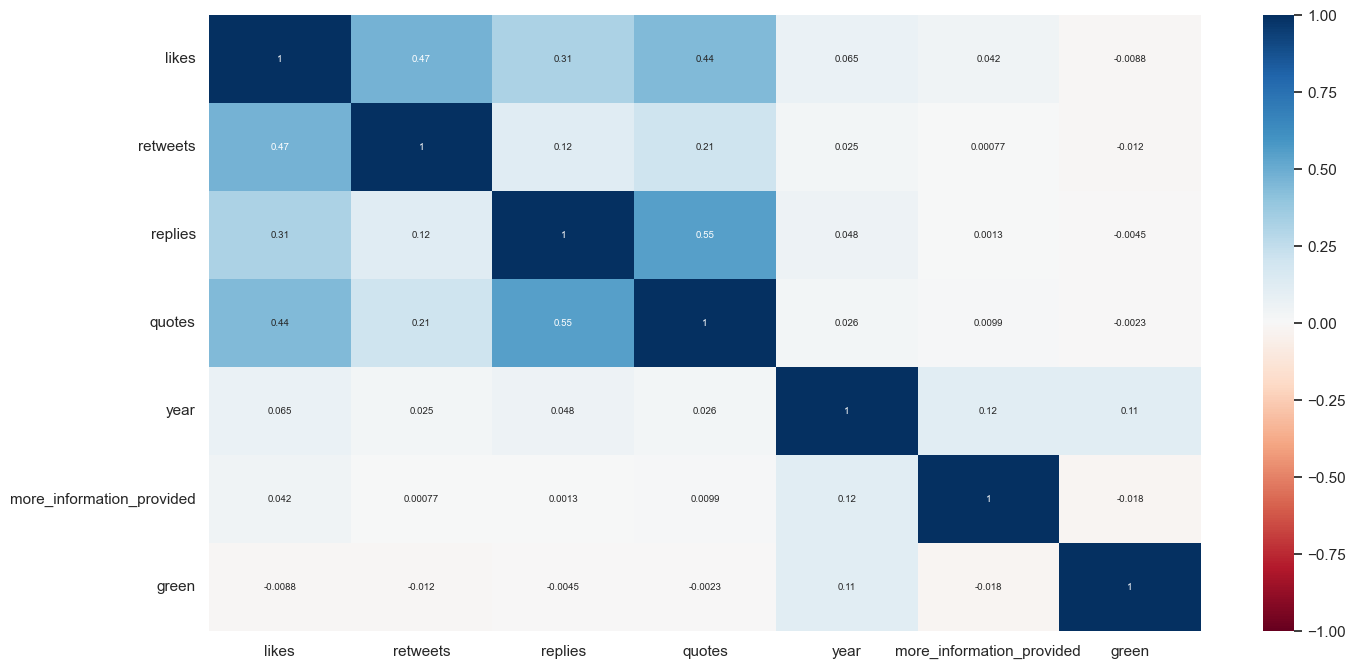

In [ ]:
sns.heatmap(cormat, cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1)

Calculate per-author correlation between 2 variables (set corr_var_1 and corr_var_2) (for each author and median)

In [19]:
corr_var_1 = 'likes' #options 'likes', 'retweets', 'replies', 'quotes', 'year', 'more_information_provided', 'green'
corr_var_2 = 'green' #same options
corr_series = stats.groupby('author')[[corr_var_1,corr_var_2]].corr().unstack().iloc[:,1]
corr_series

author
Airbus             0.013944
Allianz            0.013739
BASF               0.011731
BMW                0.024975
Bayer              0.035682
Beiersdorf_AG     -0.022008
Brenntag           0.039632
DaimlerTruck       0.017383
DeutscheBank      -0.005831
DeutscheBoerse     0.036211
DeutschePostDHL    0.029130
EON_SE_en         -0.028015
FMC_AG            -0.017880
Fresenius         -0.003519
Henkel             0.077543
Infineon           0.081154
Lindeplc           0.275157
MTUaeroeng        -0.067058
MercedesBenz       0.010628
MunichRe          -0.006699
PUMA              -0.008066
Porsche           -0.010596
QIAGEN             0.012143
RWE_AG             0.130102
SAP               -0.002439
SartoriusGlobal   -0.012104
Siemens           -0.010736
SiemensHealth     -0.011877
Siemens_Energy     0.046944
SymriseAG          0.045413
VW                -0.013216
Vonovia_SE         0.020714
Zalando           -0.003216
adidas             0.007038
continentaltire   -0.021547
covestro     

In [20]:
print("Correlation between "+ corr_var_1 + " and "+ corr_var_2 + " averaged over authors: " + str(corr_series.mean()))

Correlation between likes and green averaged over authors: 0.0186696284749872


In [47]:
#likes	retweets	replies	quotes
metric = "likes"
groupby = ["author","green"]

pd.set_option('display.max_rows', None)
rp.summary_cont(data.groupby(groupby)[metric])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


N      Mean         SD        SE  95% Conf.  \
author          green                                                    
Airbus          False   7710  150.3992   362.2769    4.1259   142.3114   
                True     316  176.3703   361.2895   20.3241   136.3821   
Allianz         False   4607   11.4187   225.6101    3.3239     4.9023   
                True     773   19.9780   170.4397    6.1303     7.9440   
BASF            False   5821   10.8315    76.5825    1.0038     8.8637   
                True    1336   13.1063    70.9602    1.9414     9.2978   
BMW             False   6027  470.6959   736.5891    9.4880   452.0960   
                True     244  564.9631   533.9435   34.1822   497.6318   
Bayer           False   7246   11.3944    55.4617    0.6515    10.1172   
                True     634   18.6136    49.4335    1.9633    14.7583   
Beiersdorf_AG   False    443    7.1287    50.7621    2.4118     2.3887   
                True     112    4.6429     3.0309    0.2864     4.0753   
Brenntag        False    782    4.5141     3.9742    0.1421     4.2351   
                True      84    5.0357     3.0751    0.3355     4.3684   
DaimlerTruck    False   9258   49.6615   120.3071    1.2504    47.2105   
                True    1027   56.4362    78.9198    2.4626    51.6038   
DeutscheBank    False  13354    7.7632    46.0188    0.3982     6.9826   
                True     865    6.6682    20.8242    0.7080     5.2785   
DeutscheBoerse  False   7626    1.0708     4.2982    0.0492     0.9743   
                True     237    1.9747     3.0252    0.1965     1.5875   
DeutschePostDHL False  10408    5.8517    41.0832    0.4027     5.0623   
                True    1150   10.3078    76.0685    2.2431     5.9067   
EON_SE_en       False   2301   42.5698   258.3196    5.3852    32.0095   
                True     667   27.1004    78.1707    3.0268    21.1573   
FMC_AG          False    668    7.2934    20.1335    0.7790     5.7639   
                True      27    5.4444    16.4512    3.1660    -1.0634   
Fresenius       False   3004    2.0083    12.9903    0.2370     1.5436   
                True      42    1.6190     2.3577    0.3638     0.8843   
Henkel          False   2505    5.4132    12.2341    0.2444     4.9339   
                True     837    7.7407    14.9591    0.5171     6.7258   
Infineon        False   5365    3.5735    10.7303    0.1465     3.2863   
                True     274    7.5693     6.1188    0.3697     6.8416   
Lindeplc        False   2729    3.9879     8.5011    0.1627     3.6688   
                True     512   11.5039    14.0006    0.6187    10.2883   
MTUaeroeng      False    304    6.2105     8.4112    0.4824     5.2612   
                True      50    4.6800     4.1179    0.5824     3.5097   
MercedesBenz    False  21242  330.4598   683.9217    4.6925   321.2621   
                True     464  380.4116   452.9263   21.0266   339.0923   
MunichRe        False  10662    5.6367   124.2584    1.2034     3.2779   
                True    1164    2.9631    47.0667    1.3795     0.2564   
PUMA            False  10201  143.5153  2309.9278   22.8706    98.6845   
                True     198    8.4848    52.4437    3.7270     1.1349   
Porsche         False   4149  243.2871   596.8751    9.2664   225.1199   
                True      61  190.5902   388.7920   49.7797    91.0159   
QIAGEN          False   3908    3.8247    33.4129    0.5345     2.7768   
                True      40    7.8750    32.9173    5.2047    -2.6525   
RWE_AG          False   4675    2.5782     7.8272    0.1145     2.3538   
                True     927    5.6775    12.5228    0.4113     4.8703   
SAP             False  26148   19.2773   235.5793    1.4569    16.4217   
                True     904   16.1305    57.9730    1.9282    12.3463   
SartoriusGlobal False   4319   14.4163    98.1458    1.4934    11.4884   
                True      84    5.8095    26.6040    2.9027     0.0361   
Siemens         False   9531   

### Linear Model

Set the dependent and independent variabes for the Linear Model

In [48]:
dependent_var = "likes" #options "likes", "retweets", "quotes"
independent_var = ["C(green)", "retweets", "C(more_information_provided)"] #options: "C(green)", "C(author)", "retweets", "quotes", "replies"

In [49]:
import statsmodels.formula.api as smf

model = smf.mixedlm(dependent_var + "~ " + (" + ").join(independent_var),
                    data,
                    groups= "author").fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                    MixedLM         Dependent Variable:         likes        
No. Observations:         306131          Method:                     REML         
No. Groups:               39              Scale:                      369565.6921  
Min. group size:          3               Log-Likelihood:             -2396775.2015
Max. group size:          27052           Converged:                  Yes          
Mean group size:          7849.5                                                   
-----------------------------------------------------------------------------------
                                      Coef.   Std.Err.    z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------------
Intercept                             -10.407   13.002  -0.800 0.423 -35.891 15.077
C(green)[T.True]                       11.813    4.352   2.714 0.007   3.283 20.342
C(more_information_provided)[T.True]   54.322    2.572  21.116 0.000  49.280 59.364
retweets                                0.784    0.003 291.476 0.000   0.779  0.789
author Var                           6162.229    2.381                             
===================================================================================

"""

### Non-Linear Poisson Model

In [57]:
df = data[['green','quotes','retweets','author','likes']]
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))
expr = """likes ~ author  + retweets + quotes + green"""
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

Training data set length=244861
Testing data set length=61270


In [58]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  likes   No. Observations:               244861
Model:                            GLM   Df Residuals:                   244819
Model Family:                 Poisson   Df Model:                           41
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2142e+07
Date:                Sat, 11 Feb 2023   Deviance:                   4.3624e+07
Time:                        00:02:04   Pearson chi2:                 3.69e+08
No. Iterations:                    25   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             